# [ForneyLab] Large-Scale Non-linear Dynamical System 

This notebook does not perform any becnhmark and simply runs the inference procedure and generates some nice plots for the thesis.

Note: This notebook is a draft, the real experiments are in the `notebooks/` folder

_Author: Dmitry Bagaev_

In [1]:
using DrWatson

In [2]:
@quickactivate "RxInferThesisExperiments"

In [21]:
using RxInferThesisExperiments, ForneyLab, StaticArrays, Plots, PGFPlotsX, LaTeXStrings
using LinearAlgebra, StableRNGs, Random, BenchmarkTools, ColorSchemes, Dates

import Distributions # ForneyLab conflicts with `mean` & `std`

In [4]:
# For the thesis I use the `pgfplotsx` backend of the `Plots`, since it generates high-quiality plots
# But it is reallyyy slow, if some wants to generate plots faster uncoment the `gr()` line
# pgfplotsx()

# Use fast plotting backend
gr()

Plots.GRBackend()

In [5]:
# Pregenerate paths for plots 
mkpath(plotsdir("nlds"));

## Double pendulum environment

In [6]:
# Create default environment with default parameters
const environment = DoublePendulum()

DoublePendulum()

In [7]:
# Define state-transition function, uses RK4 method internally, see the `src/` folder
f(state) = state_transition(environment)(state)

f (generic function with 1 method)

In [14]:
# Include the model specification from ForneyLab
include(srcdir("models", "forneylab", "doublependulum.jl"));

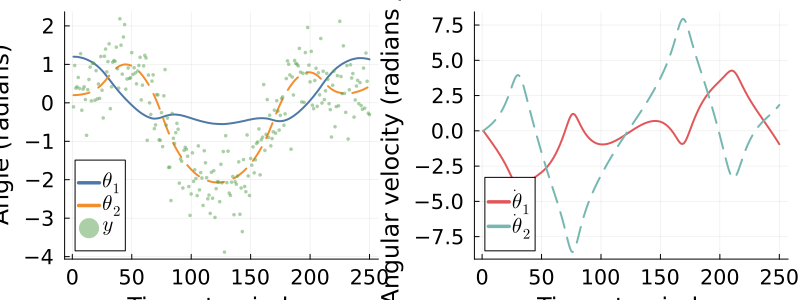

In [15]:
# For plotting purposes I only generate 250 points
T = 250
seed = 43
rng = StableRNG(seed)

states, observations = rand(rng, environment, T; random_start = false);

# `plotting`range
prange = firstindex(states):lastindex(states)
colors = ColorSchemes.tableau_10

# Some default settings for plotting
pfontsettings = (
    titlefontsize=18,
    guidefontsize=16,
    tickfontsize=14,
    legendfontsize=14,
    legend = :bottomleft,
    size = (400, 300)
)

p1 = plot(xlabel = "Time step index", ylabel = "Angle (radians)"; pfontsettings...)
p1 = plot!(prange, getindex.(states, 1)[prange], color = colors[1], linewidth = 2, label = L"\theta_1")
p1 = plot!(p1, prange, getindex.(states, 2)[prange], color = colors[2], linewidth = 2, label = L"\theta_2", style = :dash)
p1 = scatter!(p1, prange, observations[prange], ms = 2, msw = 0, color = colors[5], alpha = 0.5, label = L"y")

p2 = plot(xlabel = "Time step index", ylabel = "Angular velocity (radians / s)"; pfontsettings...)
p2 = plot!(p2, prange, getindex.(states, 3)[prange], color = colors[3], linewidth = 2, label = L"\dot{\theta}_1")
p2 = plot!(p2, prange, getindex.(states, 4)[prange], color = colors[4], linewidth = 2, label = L"\dot{\theta}_2", style = :dash)

plot(p1, p2, layout = @layout([ a b ]), size = (800, 300))

In [17]:
flmodel    = double_pendulum(T; force = false)
results    = run_inference(flmodel, observations);

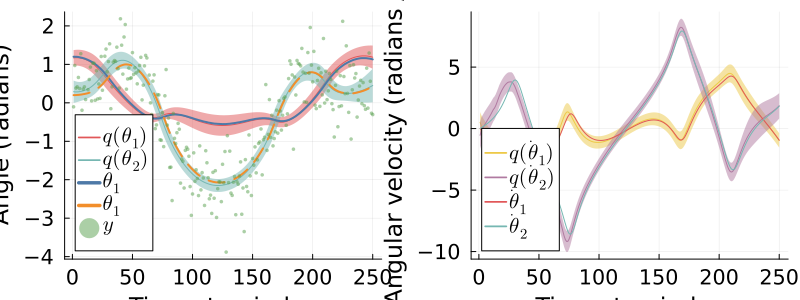

In [22]:
posteriors = extract_posteriors(T, results)

em = Distributions.mean.(posteriors)
ev = Distributions.std.(posteriors)
p1 = plot(xlabel = "Time step index", ylabel = "Angle (radians)"; pfontsettings...)

plot!(prange, getindex.(em, 1)[prange], color = colors[3], ribbon = 3getindex.(ev, 1, 1), label = L"q(\theta_1)")
plot!(prange, getindex.(em, 2)[prange], color = colors[4], ribbon = 3getindex.(ev, 2, 2), label = L"q(\theta_2)")
plot!(prange, getindex.(states, 1)[prange], label = L"\theta_1", color = colors[1], linewidth = 2,)
plot!(prange, getindex.(states, 2)[prange], label = L"\theta_1", color = colors[2], linewidth = 2, style = :dash)
scatter!(prange, getindex.(observations, 1)[prange], ms = 2, msw = 0, alpha = 0.5, color = colors[5], label = L"y")

p2 = plot(size=(800, 300), xlabel = "Time step index", ylabel = "Angular velocity (radians / s)"; pfontsettings...)
plot!(prange, getindex.(em, 3)[prange], ribbon = 3getindex.(ev, 3, 3), color = colors[6], label = L"q(\dot{\theta}_1)")
plot!(prange, getindex.(em, 4)[prange], ribbon = 3getindex.(ev, 4, 4), color = colors[7], label = L"q(\dot{\theta}_2)")
plot!(prange, getindex.(states, 3)[prange], color = colors[3], label = L"\dot{\theta}_1")
plot!(prange, getindex.(states, 4)[prange], color = colors[4], label = L"\dot{\theta}_2")

plot(p1, p2, size = (800, 300), layout = @layout([ a b ]))

# Versions

In [23]:
versioninfo()

Julia Version 1.9.0
Commit 8e630552924 (2023-05-07 11:25 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin22.4.0)
  CPU: 12 × Intel(R) Core(TM) i7-8850H CPU @ 2.60GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 (ORCJIT, skylake)
  Threads: 2 on 12 virtual cores
Environment:
  DYLD_FALLBACK_LIBRARY_PATH = /Users/bvdmitri/.julia/artifacts/979f68ce65b087a39297a97d21aec04b1d4e9d24/lib:/Users/bvdmitri/.julia/artifacts/47a0441fc4c0611720643ad5cb10ad0fbf263c54/lib:/Users/bvdmitri/.julia/artifacts/dcc1b7719d5a106fba77bbc272d231e163d15fe5/lib:/Users/bvdmitri/.julia/juliaup/julia-1.9.0+0.x64.apple.darwin14/lib/julia:/Users/bvdmitri/.julia/artifacts/0c9c721045741232851be4413320f4fbc87949ba/lib:/Users/bvdmitri/.julia/artifacts/397fee52d94fc3404c3e466a6a8277ad9fdde715/lib:/Users/bvdmitri/.julia/artifacts/1baa8287e6dbb83d8a9236003985bdcc7f34c39c/lib:/Users/bvdmitri/.julia/artifacts/5d8d2f8a7579b33069ae2ae9079c4523d1947d13/lib:/Users/bvdmitri/.julia/artifacts/9194d75745cbb36d5b00e2b

In [20]:
] status

Project RxInferThesisExperiments v1.0.0
Status `~/.julia/dev/thesis/Project.toml`
  [6e4b80f9] BenchmarkTools v1.3.2
  [35d6a980] ColorSchemes v3.21.0
  [a93c6f00] DataFrames v1.5.0
⌃ [31c24e10] Distributions v0.25.94
  [634d3b9d] DrWatson v2.12.5
  [9fc3f58a] ForneyLab v0.12.0
  [f6369f11] ForwardDiff v0.10.35
  [7073ff75] IJulia v1.24.0
  [b964fa9f] LaTeXStrings v1.3.0
  [3bd65402] Optimisers v0.2.18
  [8314cec4] PGFPlotsX v1.6.0
  [e4faabce] PProf v2.2.2
⌃ [91a5bcdd] Plots v1.38.12
  [37e2e3b7] ReverseDiff v1.14.6
⌃ [86711068] RxInfer v2.10.4
  [860ef19b] StableRNGs v1.0.0
  [aedffcd0] Static v0.8.7
  [90137ffa] StaticArrays v1.5.25
  [fce5fe82] Turing v0.25.1
  [37e2e46d] LinearAlgebra
  [9a3f8284] Random
Info Packages marked with ⌃ have new versions available and may be upgradable.
